<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Библиотеки" data-toc-modified-id="Библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Библиотеки</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Поиск-метода-преобразования-данных" data-toc-modified-id="Поиск-метода-преобразования-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Поиск метода преобразования данных</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Библиотеки

In [1]:
# импорты из стандартной библиотеки
import os
import warnings

# импорты сторонних библиотек
import numpy as np
import pandas as pd

# импорты модулей текущего проекта
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# настройки
warnings.filterwarnings("ignore")

# константы заглавными буквами
RANDOM_STATE = 0
PATH = PATH = 'C:/Users/igors/OneDrive/Рабочий стол/Портфолио/9. Защита персональных данных клиентов/insurance.csv'

## Загрузка данных

Загрузим и просмотрим данные

In [2]:
if os.path.exists(PATH):
    data = pd.read_csv(PATH)
else:
    print('Ошибка в считывании данных')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Очевидно, что в данных нет пропусков

In [5]:
data.drop(['Пол'], axis=1).describe()

,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.952800,39916.360000,1.194200,0.148000
std,8.440807,9900.083569,1.091387,0.463183
min,18.000000,5300.000000,0.000000,0.000000
25%,24.000000,33300.000000,0.000000,0.000000
50%,30.000000,40200.000000,1.000000,0.000000
75%,37.000000,46600.000000,2.000000,0.000000
max,65.000000,79000.000000,6.000000,5.000000


array([[<AxesSubplot:title={'center':'Возраст'}>,
        <AxesSubplot:title={'center':'Зарплата'}>],
       [<AxesSubplot:title={'center':'Члены семьи'}>,
        <AxesSubplot:title={'center':'Страховые выплаты'}>]], dtype=object)

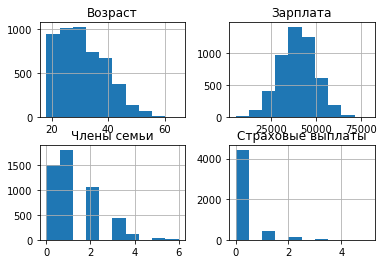

In [6]:
data.drop(['Пол'], axis=1).hist()

По статистическому описанию видно, что количество детей больше двух являетсяя редким, как ненулевое количество страховых выплат. Распределние возраста похоже на распределение Пуассона, распределение зарплат - на нормальное.

In [7]:
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


Есть слабая зависимоть между количеством страховых выплат и возрастом клиента, но её не достаточно, чтобы говорить о мультиколлинеарности.

In [8]:
data.duplicated().sum()

153

Хотя в датафрейме есть дубликаты, их не стоит удалять, так как у разных клиентов могут быть одинаковые данные.

### Вывод

В ходе изучения данных было выявлено, что
 - что в данных нет пропусков;
 - что количество детей болше двух и ненулевое количество страховых выплат - это редкость;
 - зарплата имеет нормальное распределение, возраст - распределение Пуассона.

## Поиск метода преобразования данных

Принцип линейной регрессии.

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

 **При умножении признаков на обратимую матрицу качество линейной регрессии не изменится.**

**Обоснование**. Пусть $X$ — матрица признаков $m \times n$, $I$ — обратимая матрица $n \times n$, $a, w$ - предсказания и веса исходной линейной регресси соответственно. Обозначим $a^I$ предсказания линейной регрессии после умножения $X$ на $I$: 
$$
a^I = XIw^I,
$$
где $w^I$ — новый вектор весов линейной регрессии. Тогда согласно формуле обучения
$$
w^I = \left( \left( XI \right)^T \left( XI \right) \right)^{-1} \left( XI \right)^T y =  \left( I^T \left( X^T X \right) I \right)^{-1} I^T X^T y = I^{-1} \left( X^T X \right)^{-1} (I^T)^{-1} I^T X^T y = I^{-1} \left( X^T X \right)^{-1} X^T y = I^{-1} w,
$$
откуда

$$
a^I = X I w^I = X I I^{-1} w = X w = a.
$$

Таким образом, предсказания линейной регресси не изменятся, следовательно, не изменится и её качество.

## Алгоритм преобразования

**Алгоритм**

Входные данные: $X_t$ — матрица признаков для обучения, $X_v$ — матрица признаков для проверки качества линейной регрессии, $y_t$ — вектор целевого признака для обучения, $y_v$ — вектор целевого признака для проверки качества.

Выходные данные: $X_t^I$ — преобразованная признаковая матрица для обучения, $X_v^I$ — преобразованная признаковая матрица для проверки качества линейной регрессии, $I^{-1}$ — декодирующая матрица, $score$ — значение метрики $R^2$ линейной регрессии на исходных данных, $score^I$ — значение метрики $R^2$ линейной регрессии на преобразованных данных, $result$ — результат сравнения метрик $R^2$ полученных моделей. 

1. Определить $n$ - количество столбцов матрицы $X$.
2. Сгенерировать случайнум образом квадратную матрицу $I$ размера $n \times n$; диапазон значений матрицы - $[0, 99] \in \mathbb{N}_0$.
3. Проверить $I$ на обратимость: 
    - определить $det I$;
    - если $det I = 0$, вернуться к п. 2.
4. Рассчитать $I^{-1}$
5. Рассчитать $X_t^I = X_tI$.
5. Рассчитать $X_v^I = X_vI$.
6. Обучить модель линейной регрессии $model$ на $X_t$ и $y_t$.
7. Получить $predict$ — предсказание модели $model1$ для $X_v$.
8. Рассчитать $score$ — значение метрики $R^2$ для $model$.
9. Обучить модель линейной регрессии $model^I$ на $X_t^I$ и $y_t$.
10. Получить $predict^I$ — предсказание модели $model^I$ для $X_v$.
11. Рассчитать $score^I$ — значение метрики $R^2$ для $model^I$.
12. Вывести $score$ и $score^I$.
12. Сравнить $score$ и $score^I$:
    - если $score = score^I$, вывести $result =$ 'Качество линейной регресси не изменилось', перейти к п. 15;
    - если $score \neq score^I$, вывести $result =$ 'Качество линейной регресси изменилось', завершить алгоритм.
13. Вывести $I^{-1}$

**Обоснование** сохранения качества линейной регрессии аналогично обоснованию из раздела 3.

**Примечание.** Возврат матрицы $I^{-1}$ производится для возможности последующего восстановления данных с помощью умножения матрицы преобразованных данных $X^I$ на $I^{-1}$.

**Замечание.** Не зная матрицы $I$ или $I^{-1}$, нельзя однозначно восстановить признаковую матрицу $X$ по матрице $X^I$.

## Проверка алгоритма

Напишем функции, реализующие алгоритм из раздела 4.

In [9]:
def transform(X, I=None):
    n = X.shape[1]
    if I is None:
        I = np.random.randint(0, 99, (n, n))
        while np.linalg.det(I) == 0:
            I = np.random.randint(0, 99, (n, n))
    XI = X.values @ I
    return XI, np.linalg.inv(I)

In [10]:
def experiment(features_train, features_valid, target_train, target_valid):
    features_train_encoded, I = transform(features_train)
    features_valid_encoded, _ = transform(features_valid, np.linalg.inv(I))
    
    model_before = LinearRegression().fit(features_train, target_train)
    predict_before = model_before.predict(features_valid)
    score_before = r2_score(target_valid, predict_before)

    model_after = LinearRegression().fit(features_train_encoded, target_train)
    predict_after = model_after.predict(features_valid_encoded)
    score_after = r2_score(target_valid, predict_after)
    
    print(f'Качество модели до преобразования признаков: {score_before:%}')
    print(f'Качество модели после преобразования признаков: {score_after:%}')
    
    #Из-за особенностей хранения float без округления получается, что значния не равны
    if round(score_before, 8) == round(score_after, 8):   
        print('Качество линейной регресси на исходных и преобразованных данных совападет.')
        print('Декодирующая матрица:')
        print(I)
    else:
        print('Качество линейной регресси на исходных и преобразованных данных не совападет.')

Разделим данные на признаки, целевой признак, а затем сформируем обучающие и валидационные выборки.

In [11]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.25, 
                                                                              random_state=RANDOM_STATE)

Проверим качество линейной регресси на исходных признаках и на преобразованных. Сохраним декодирующую матрицу,

In [12]:
experiment(features_train, features_valid, target_train, target_valid)

Качество модели до преобразования признаков: 38.787396%
Качество модели после преобразования признаков: 38.787396%
Качество линейной регресси на исходных и преобразованных данных совападет.
Декодирующая матрица:
[[-0.01880826  0.01011979  0.00081961  0.02199453]
 [-0.00880593  0.01425541  0.02208396 -0.03948604]
 [ 0.01063889  0.00546768 -0.00965068  0.00084778]
 [ 0.01040325 -0.01590604 -0.00297287  0.02157916]]


### Вывод

Эксперимент подтвердил теорию: качество линейной регрессии, обученной на исходных данных, равняется с качеству линейной регресси, обученной на преобразованных данных.

## Общий вывод

В ходе работы
 - были загружены, изучены и предобработаны данные;
 - был разработан метод шифрования данных, устойчивым к атакам;
 - было теоретически обосновано, что качество линейной регресси, обученной на исходных данных, сохраняется для преобразованных;
 - был написан алогритм шифорвания и проведения эксперимента;
 - были написаны функции, реализующая алгоритм;
 - теоретические результаты о сохранении качества линейной регресси были подтверждены практически.